# Correr experimentos
En este archivo está el código para correr los experimentos

In [1]:
import math, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, os

In [2]:
def almost_equals(a, b, tolerance = 1e-4):
    return abs(a - b) < tolerance

In [3]:
ruta_del_ejecutable = "../src/tp3"
np.random.seed(10)

### Ejecutar algoritmo

In [4]:
def correr_experimento(carpeta, nombre_archivo, p, algoritmo):
    start = time.time()
    
    # Crear proceso para ejecutar el codigo.
    output_dir = os.path.join(os.getcwd(), 'resultados')
    
    process = subprocess.Popen([ruta_del_ejecutable, os.path.join(carpeta, nombre_archivo), str(p), algoritmo], cwd=output_dir)

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(Exception(f'Hubo un error en la experimentacion para el algoritmo con la instancia {nombre_archivo}.'))
    
    end = time.time()
    
    tiempo_ejecucion = end-start
    
    # Leemos los archivos de salida
    f = open(os.path.join(output_dir, f'{nombre_archivo}.out'), 'r')
    respuestas = []
    line_index = 0
    for line in f:
        line_index += 1
        if line_index == 1:
            continue
        respuestas.append(float(line))
    f.close()
    os.remove(os.path.join(output_dir, f'{nombre_archivo}.out'))
    # Leemos las iteraciones (hay que descomentar parte del código c++ para que genere los archivos)
    iteraciones = []
    iteracion = 0
    while os.path.isfile(os.path.join(output_dir, f'iteraciones.{iteracion}.out')):
        resultado_iteracion_actual = []
        f2 = open(os.path.join(output_dir, f'iteraciones.{iteracion}.out'), 'r')
        for line in f2:
            resultado_iteracion_actual.append(float(line))
        iteraciones.append(resultado_iteracion_actual)
        f2.close()
        os.remove(os.path.join(output_dir, f'iteraciones.{iteracion}.out'))
        iteracion += 1
    return tiempo_ejecucion, respuestas, iteraciones

In [6]:
# Prueba piloto
tiempo_de_ejecucion, respuestas, tiempos = correr_experimento('../../tests/', 'test_aleatorio_desordenado.txt', 0.9, 'jb')

print(tiempo_de_ejecucion)
print('--------------------------------')
print(respuestas)
print('--------------------------------')
print(tiempos)

0.08703374862670898
--------------------------------
[0.21978, 0.071437, 0.203294, 0.21978, 0.285709]
--------------------------------
[]


In [5]:
def generate_times_for(carpeta, archivo, algoritmo, p = 0.7, numero_de_repeticiones = 10):
    tiempos = []

    # Voy mostrando que experimento se esta ejecutando.
    print('Corriendo experimento: %s' % (archivo))

    for repeticion in range(numero_de_repeticiones):
        tiempo_de_ejecucion, _, _ = correr_experimento(carpeta, archivo, p, algoritmo)
        tiempos.append(tiempo_de_ejecucion)
    
    varianza = np.var(tiempos)
    # assert(varianza < 1e-2)

    return sum(tiempos) / len(tiempos)

### Experimento complejidad con instancias aleatorias

In [47]:
n = range(20, 301, 20)

def nombre_archivo(n, links):
    return f'n_{int(n)}Links_{int(links)}'

carpeta = '../instancias/complejidad temporal/'

times_025_n2_links_eg = [generate_times_for(carpeta, nombre_archivo(current_n, 0.25*current_n*current_n), 'eg') for current_n in n]
times_050_n2_links_eg = [generate_times_for(carpeta, nombre_archivo(current_n, 0.5*current_n*current_n), 'eg') for current_n in n]
times_075_n2_links_eg = [generate_times_for(carpeta, nombre_archivo(current_n, 0.75*current_n*current_n), 'eg') for current_n in n]
times_100_n2_links_eg = [generate_times_for(carpeta, nombre_archivo(current_n, current_n*current_n), 'eg') for current_n in n]

times_025_n2_links_jb = [generate_times_for(carpeta, nombre_archivo(current_n, 0.25*current_n*current_n), 'jb') for current_n in n]
times_050_n2_links_jb = [generate_times_for(carpeta, nombre_archivo(current_n, 0.5*current_n*current_n), 'jb') for current_n in n]
times_075_n2_links_jb = [generate_times_for(carpeta, nombre_archivo(current_n, 0.75*current_n*current_n), 'jb') for current_n in n]
times_100_n2_links_jb = [generate_times_for(carpeta, nombre_archivo(current_n, current_n*current_n), 'jb') for current_n in n]

times_025_n2_links_gs = [generate_times_for(carpeta, nombre_archivo(current_n, 0.25*current_n*current_n), 'gs') for current_n in n]
times_050_n2_links_gs = [generate_times_for(carpeta, nombre_archivo(current_n, 0.5*current_n*current_n), 'gs') for current_n in n]
times_075_n2_links_gs = [generate_times_for(carpeta, nombre_archivo(current_n, 0.75*current_n*current_n), 'gs') for current_n in n]
times_100_n2_links_gs = [generate_times_for(carpeta, nombre_archivo(current_n, current_n*current_n), 'gs') for current_n in n]

Corriendo experimento: n_20Links_100
Corriendo experimento: n_40Links_400
Corriendo experimento: n_60Links_900
Corriendo experimento: n_80Links_1600
Corriendo experimento: n_100Links_2500
Corriendo experimento: n_120Links_3600
Corriendo experimento: n_140Links_4900
Corriendo experimento: n_160Links_6400
Corriendo experimento: n_180Links_8100
Corriendo experimento: n_200Links_10000
Corriendo experimento: n_220Links_12100
Corriendo experimento: n_240Links_14400
Corriendo experimento: n_260Links_16900
Corriendo experimento: n_280Links_19600
Corriendo experimento: n_300Links_22500
Corriendo experimento: n_20Links_200
Corriendo experimento: n_40Links_800
Corriendo experimento: n_60Links_1800
Corriendo experimento: n_80Links_3200
Corriendo experimento: n_100Links_5000
Corriendo experimento: n_120Links_7200
Corriendo experimento: n_140Links_9800
Corriendo experimento: n_160Links_12800
Corriendo experimento: n_180Links_16200
Corriendo experimento: n_200Links_20000
Corriendo experimento: n_220L

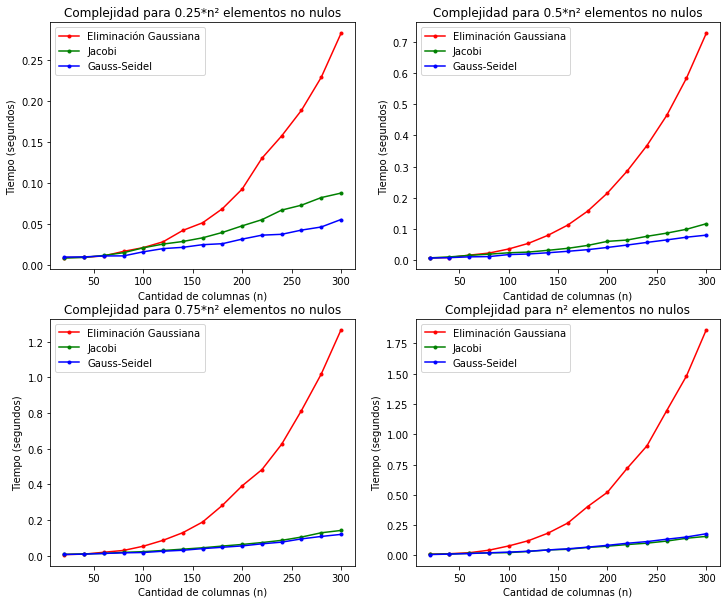

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))

n = range(20, 301, 20)

nro_links = "0.25*n²"
ax1.plot(n, times_025_n2_links_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
ax1.plot(n, times_025_n2_links_jb, marker='.', linestyle='-', color='g', label="Jacobi")
ax1.plot(n, times_025_n2_links_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
ax1.set_xlabel("Cantidad de columnas (n)")
ax1.set_ylabel("Tiempo (segundos)")
ax1.set_title(f"Complejidad para {nro_links} elementos no nulos")
ax1.legend()

nro_links = "0.5*n²"
ax2.plot(n, times_050_n2_links_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
ax2.plot(n, times_050_n2_links_jb, marker='.', linestyle='-', color='g', label="Jacobi")
ax2.plot(n, times_050_n2_links_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
ax2.set_xlabel("Cantidad de columnas (n)")
ax2.set_ylabel("Tiempo (segundos)")
ax2.set_title(f"Complejidad para {nro_links} elementos no nulos")
ax2.legend()

nro_links = "0.75*n²"
ax3.plot(n, times_075_n2_links_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
ax3.plot(n, times_075_n2_links_jb, marker='.', linestyle='-', color='g', label="Jacobi")
ax3.plot(n, times_075_n2_links_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
ax3.set_xlabel("Cantidad de columnas (n)")
ax3.set_ylabel("Tiempo (segundos)")
ax3.set_title(f"Complejidad para {nro_links} elementos no nulos")
ax3.legend()

nro_links = "n²"
ax4.plot(n, times_100_n2_links_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
ax4.plot(n, times_100_n2_links_jb, marker='.', linestyle='-', color='g', label="Jacobi")
ax4.plot(n, times_100_n2_links_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
ax4.set_xlabel("Cantidad de columnas (n)")
ax4.set_ylabel("Tiempo (segundos)")
ax4.set_title(f"Complejidad para {nro_links} elementos no nulos")
ax4.legend()


plt.savefig('./graficos/complejidad_aleatoria.png')
plt.show()
plt.close()

### Experimento complejidad instancias 3 principales

In [49]:
archivos = [
    "100_paginas_50_links_P_0.7.txt",
    "200_paginas_100_links_P_0.7.txt",
    "300_paginas_150_links_P_0.7.txt",
    "400_paginas_200_links_P_0.7.txt",
    "500_paginas_250_links_P_0.7.txt",
    "600_paginas_300_links_P_0.7.txt",
    "700_paginas_350_links_P_0.7.txt",
    "800_paginas_400_links_P_0.7.txt",
    "900_paginas_450_links_P_0.7.txt",
    "1000_paginas_500_links_P_0.7.txt",
]

carpeta = '../instancias/3 Principales/'

times_3_principales_eg = [generate_times_for(carpeta, archivo, 'eg') for archivo in archivos]
times_3_principales_jb = [generate_times_for(carpeta, archivo, 'jb') for archivo in archivos]
times_3_principales_gs = [generate_times_for(carpeta, archivo, 'gs') for archivo in archivos]

Corriendo experimento: 100_paginas_50_links_P_0.7.txt
Corriendo experimento: 200_paginas_100_links_P_0.7.txt
Corriendo experimento: 300_paginas_150_links_P_0.7.txt
Corriendo experimento: 400_paginas_200_links_P_0.7.txt
Corriendo experimento: 500_paginas_250_links_P_0.7.txt
Corriendo experimento: 600_paginas_300_links_P_0.7.txt
Corriendo experimento: 700_paginas_350_links_P_0.7.txt
Corriendo experimento: 800_paginas_400_links_P_0.7.txt
Corriendo experimento: 900_paginas_450_links_P_0.7.txt
Corriendo experimento: 1000_paginas_500_links_P_0.7.txt
Corriendo experimento: 100_paginas_50_links_P_0.7.txt
Corriendo experimento: 200_paginas_100_links_P_0.7.txt
Corriendo experimento: 300_paginas_150_links_P_0.7.txt
Corriendo experimento: 400_paginas_200_links_P_0.7.txt
Corriendo experimento: 500_paginas_250_links_P_0.7.txt
Corriendo experimento: 600_paginas_300_links_P_0.7.txt
Corriendo experimento: 700_paginas_350_links_P_0.7.txt
Corriendo experimento: 800_paginas_400_links_P_0.7.txt
Corriendo e

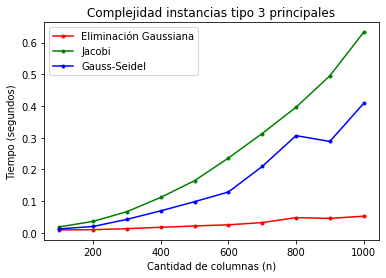

In [51]:
n = range(100, 1001, 100)

plt.plot(n, times_3_principales_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
plt.plot(n, times_3_principales_jb, marker='.', linestyle='-', color='g', label="Jacobi")
plt.plot(n, times_3_principales_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
plt.xlabel("Cantidad de columnas (n)")
plt.ylabel("Tiempo (segundos)")
plt.title(f"Complejidad instancias tipo 3 principales")
plt.legend()


plt.savefig('./graficos/complejidad_3_principales.png')
plt.show()
plt.close()

### Experimento complejidad instancias 3 principales y un anillo

In [52]:
archivos = [
    "89_Inicio_100_paginas_P_0.7.txt",
    "179_Inicio_200_paginas_P_0.7.txt",
    "269_Inicio_300_paginas_P_0.7.txt",
    "359_Inicio_400_paginas_P_0.7.txt",
    "449_Inicio_500_paginas_P_0.7.txt",
    "539_Inicio_600_paginas_P_0.7.txt",
    "629_Inicio_700_paginas_P_0.7.txt",
    "719_Inicio_800_paginas_P_0.7.txt",
    "809_Inicio_900_paginas_P_0.7.txt",
    "899_Inicio_1000_paginas_P_0.7.txt",
]

carpeta = '../instancias/3 Principales y Anillo/'

times_3_principales_anillo_eg = [generate_times_for(carpeta, archivo, 'eg') for archivo in archivos]
times_3_principales_anillo_jb = [generate_times_for(carpeta, archivo, 'jb') for archivo in archivos]
times_3_principales_anillo_gs = [generate_times_for(carpeta, archivo, 'gs') for archivo in archivos]

Corriendo experimento: 89_Inicio_100_paginas_P_0.7.txt
Corriendo experimento: 179_Inicio_200_paginas_P_0.7.txt
Corriendo experimento: 269_Inicio_300_paginas_P_0.7.txt
Corriendo experimento: 359_Inicio_400_paginas_P_0.7.txt
Corriendo experimento: 449_Inicio_500_paginas_P_0.7.txt
Corriendo experimento: 539_Inicio_600_paginas_P_0.7.txt
Corriendo experimento: 629_Inicio_700_paginas_P_0.7.txt
Corriendo experimento: 719_Inicio_800_paginas_P_0.7.txt
Corriendo experimento: 809_Inicio_900_paginas_P_0.7.txt
Corriendo experimento: 899_Inicio_1000_paginas_P_0.7.txt
Corriendo experimento: 89_Inicio_100_paginas_P_0.7.txt
Corriendo experimento: 179_Inicio_200_paginas_P_0.7.txt
Corriendo experimento: 269_Inicio_300_paginas_P_0.7.txt
Corriendo experimento: 359_Inicio_400_paginas_P_0.7.txt
Corriendo experimento: 449_Inicio_500_paginas_P_0.7.txt
Corriendo experimento: 539_Inicio_600_paginas_P_0.7.txt
Corriendo experimento: 629_Inicio_700_paginas_P_0.7.txt
Corriendo experimento: 719_Inicio_800_paginas_P_0

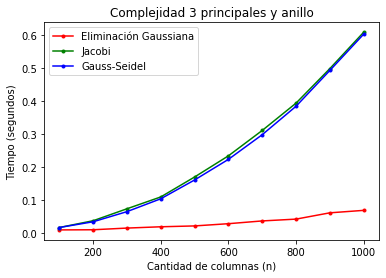

In [53]:
n = range(100, 1001, 100)

plt.plot(n, times_3_principales_anillo_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
plt.plot(n, times_3_principales_anillo_jb, marker='.', linestyle='-', color='g', label="Jacobi")
plt.plot(n, times_3_principales_anillo_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
plt.xlabel("Cantidad de columnas (n)")
plt.ylabel("Tiempo (segundos)")
plt.title(f"Complejidad 3 principales y anillo")
plt.legend()


plt.savefig('./graficos/complejidad_3_principales_anillo.png')
plt.show()
plt.close()

### Experimento complejidad instancias árbol

In [54]:
n = range(100, 1001, 100)

def nombre_archivo(n):
    return f'n_{int(n)}_Links_{int(n-2)}'

carpeta = '../instancias/Arbol/'

times_arbol_eg = [generate_times_for(carpeta, nombre_archivo(current_n), 'eg') for current_n in n]
times_arbol_jb = [generate_times_for(carpeta, nombre_archivo(current_n), 'jb') for current_n in n]
times_arbol_gs = [generate_times_for(carpeta, nombre_archivo(current_n), 'gs') for current_n in n]

Corriendo experimento: n_100_Links_98
Corriendo experimento: n_200_Links_198
Corriendo experimento: n_300_Links_298
Corriendo experimento: n_400_Links_398
Corriendo experimento: n_500_Links_498
Corriendo experimento: n_600_Links_598
Corriendo experimento: n_700_Links_698
Corriendo experimento: n_800_Links_798
Corriendo experimento: n_900_Links_898
Corriendo experimento: n_1000_Links_998
Corriendo experimento: n_100_Links_98
Corriendo experimento: n_200_Links_198
Corriendo experimento: n_300_Links_298
Corriendo experimento: n_400_Links_398
Corriendo experimento: n_500_Links_498
Corriendo experimento: n_600_Links_598
Corriendo experimento: n_700_Links_698
Corriendo experimento: n_800_Links_798
Corriendo experimento: n_900_Links_898
Corriendo experimento: n_1000_Links_998
Corriendo experimento: n_100_Links_98
Corriendo experimento: n_200_Links_198
Corriendo experimento: n_300_Links_298
Corriendo experimento: n_400_Links_398
Corriendo experimento: n_500_Links_498
Corriendo experimento: n_6

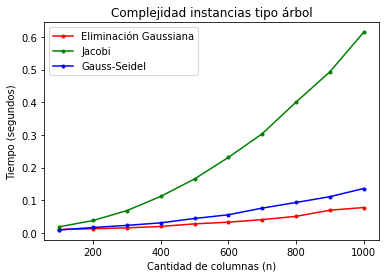

In [55]:
plt.plot(n, times_arbol_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
plt.plot(n, times_arbol_jb, marker='.', linestyle='-', color='g', label="Jacobi")
plt.plot(n, times_arbol_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
plt.xlabel("Cantidad de columnas (n)")
plt.ylabel("Tiempo (segundos)")
plt.title(f"Complejidad instancias tipo árbol")
plt.legend()


plt.savefig('./graficos/complejidad_arbol.png')
plt.show()
plt.close()

### Experimento cualitativo

In [56]:
_, resultados_eg, _ = correr_experimento('../../tests/', 'test_30_segundos.txt', 0.8, 'eg')
_, resultados_jb, _ = correr_experimento('../../tests/', 'test_30_segundos.txt', 0.8, 'jb')
_, resultados_gs, _ = correr_experimento('../../tests/', 'test_30_segundos.txt', 0.8, 'gs')

In [57]:
f = open(os.path.join(f'../tests/test_30_segundos.txt.out'), 'r')
resultados_esperados = []
line_index = 0
for line in f:
    line_index += 1
    if line_index == 1:
        continue
    resultados_esperados.append(float(line))
f.close()

In [58]:
diferencias_eg = np.abs(np.array(resultados_eg) - np.array(resultados_esperados))
diferencias_jb = np.abs(np.array(resultados_jb) - np.array(resultados_esperados))
diferencias_gs = np.abs(np.array(resultados_gs) - np.array(resultados_esperados))

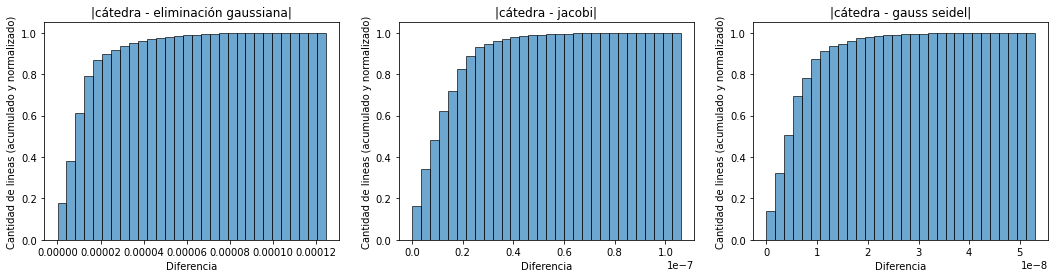

In [59]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (18,4))

ax1.hist(diferencias_eg, bins=30, cumulative=True, weights=np.ones_like(diferencias_eg) / len(diferencias_eg), edgecolor='k', alpha=0.65)
ax1.set_xlabel("Diferencia")
ax1.set_ylabel("Cantidad de lineas (acumulado y normalizado)")
ax1.set_title("|cátedra - eliminación gaussiana|")

ax2.hist(diferencias_jb, bins=30, cumulative=True, weights=np.ones_like(diferencias_jb) / len(diferencias_jb), edgecolor='k', alpha=0.65)
ax2.set_xlabel("Diferencia")
ax2.set_ylabel("Cantidad de lineas (acumulado y normalizado)")
ax2.set_title("|cátedra - jacobi|")

ax3.hist(diferencias_gs, bins=30, cumulative=True, weights=np.ones_like(diferencias_gs) / len(diferencias_gs), edgecolor='k', alpha=0.65)
ax3.set_xlabel("Diferencia")
ax3.set_ylabel("Cantidad de lineas (acumulado y normalizado)")
ax3.set_title("|cátedra - gauss seidel|")

plt.savefig('./graficos/experimento_cualitativo.png')
plt.show()
plt.close()

### Experimento análisis de convergencia

In [7]:
_, resultados_tad_jb, iteraciones_tad_jb = correr_experimento('../../tests/', 'test_aleatorio_desordenado.txt', 0.76, 'jb')
_, resultados_tad_gs, iteraciones_tad_gs = correr_experimento('../../tests/', 'test_aleatorio_desordenado.txt', 0.76, 'gs')
_, resultados_15s_jb, iteraciones_15s_jb = correr_experimento('../../tests/', 'test_15_segundos.txt', 0.9, 'jb')
_, resultados_15s_gs, iteraciones_15s_gs = correr_experimento('../../tests/', 'test_15_segundos.txt', 0.9, 'gs')
_, resultados_30s_jb, iteraciones_30s_jb = correr_experimento('../../tests/', 'test_30_segundos.txt', 0.8, 'jb')
_, resultados_30s_gs, iteraciones_30s_gs = correr_experimento('../../tests/', 'test_30_segundos.txt', 0.8, 'gs')

diferencias_tad_jb = [np.linalg.norm(np.array(iteracion) - np.array(resultados_tad_jb)) for iteracion in iteraciones_tad_jb]
diferencias_tad_gs = [np.linalg.norm(np.array(iteracion) - np.array(resultados_tad_gs)) for iteracion in iteraciones_tad_gs]
diferencias_15s_jb = [np.linalg.norm(np.array(iteracion) - np.array(resultados_15s_jb)) for iteracion in iteraciones_15s_jb]
diferencias_15s_gs = [np.linalg.norm(np.array(iteracion) - np.array(resultados_15s_gs)) for iteracion in iteraciones_15s_gs]
diferencias_30s_jb = [np.linalg.norm(np.array(iteracion) - np.array(resultados_30s_jb)) for iteracion in iteraciones_30s_jb]
diferencias_30s_gs = [np.linalg.norm(np.array(iteracion) - np.array(resultados_30s_gs)) for iteracion in iteraciones_30s_gs]

print(diferencias_tad_jb)

[0.1860579088755971, 0.05175773533646927, 0.02041371663759443, 0.009561480724239308, 0.004602463363243629, 0.00229010951921518, 0.001143712765514125, 0.0005747567224487146, 0.00028778028076988544, 0.00014342440517566644, 7.004998215559564e-05, 3.3145286241011046e-05, 1.447618734336364e-05, 5.020956084239559e-06, 0.0]


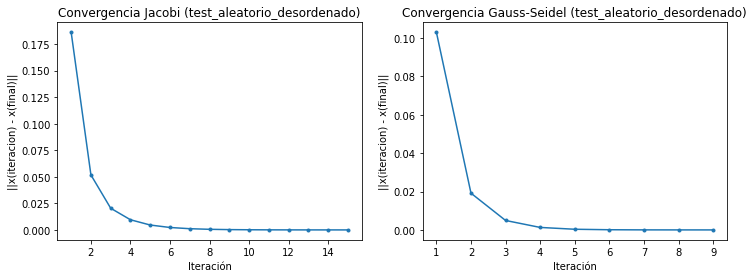

In [12]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot([i + 1 for i in range(len(iteraciones_tad_jb))], diferencias_tad_jb, marker='.', linestyle='-')
ax1.set_xlabel("Iteración")
ax1.set_ylabel("||x(iteracion) - x(final)||")
ax1.set_title("Convergencia Jacobi (test_aleatorio_desordenado)")

ax2.plot([i + 1 for i in range(len(iteraciones_tad_gs))], diferencias_tad_gs, marker='.', linestyle='-')
ax2.set_xlabel("Iteración")
ax2.set_ylabel("||x(iteracion) - x(final)||")
ax2.set_title("Convergencia Gauss-Seidel (test_aleatorio_desordenado)")

plt.savefig('./graficos/experimento_convergencia_tad.png')
plt.show()
plt.close()

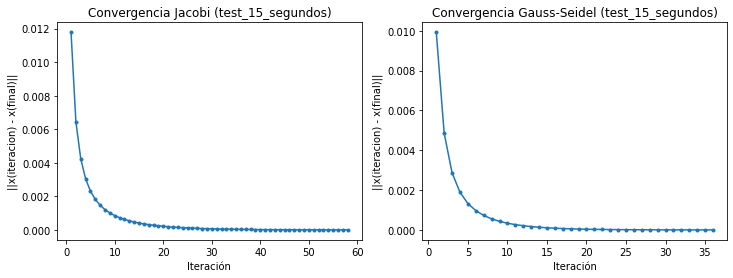

In [13]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot([i + 1 for i in range(len(iteraciones_15s_jb))], diferencias_15s_jb, marker='.', linestyle='-')
ax1.set_xlabel("Iteración")
ax1.set_ylabel("||x(iteracion) - x(final)||")
ax1.set_title("Convergencia Jacobi (test_15_segundos)")

ax2.plot([i + 1 for i in range(len(iteraciones_15s_gs))], diferencias_15s_gs, marker='.', linestyle='-')
ax2.set_xlabel("Iteración")
ax2.set_ylabel("||x(iteracion) - x(final)||")
ax2.set_title("Convergencia Gauss-Seidel (test_15_segundos)")

plt.savefig('./graficos/experimento_convergencia_15s.png')
plt.show()
plt.close()

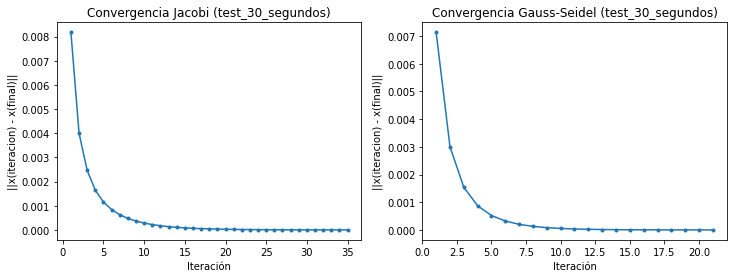

In [14]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot([i + 1 for i in range(len(iteraciones_30s_jb))], diferencias_30s_jb, marker='.', linestyle='-')
ax1.set_xlabel("Iteración")
ax1.set_ylabel("||x(iteracion) - x(final)||")
ax1.set_title("Convergencia Jacobi (test_30_segundos)")

ax2.plot([i + 1 for i in range(len(iteraciones_30s_gs))], diferencias_30s_gs, marker='.', linestyle='-')
ax2.set_xlabel("Iteración")
ax2.set_ylabel("||x(iteracion) - x(final)||")
ax2.set_title("Convergencia Gauss-Seidel (test_30_segundos)")

plt.savefig('./graficos/experimento_convergencia_30s.png')
plt.show()
plt.close()

### Complejidad en función de la densidad de la matriz

In [12]:
links = [100, 991, 1981, 2971, 3961, 4951, 5941, 6931, 7921, 8911, 9901]

def nombre_archivo(links):
    return f'n_100Links_{links}'

carpeta = '../instancias/complejidad temporal aristas/'

times_complejidad_densidad_eg = [generate_times_for(carpeta, nombre_archivo(current), 'eg') for current in links]
times_complejidad_densidad_jb = [generate_times_for(carpeta, nombre_archivo(current), 'jb') for current in links]
times_complejidad_densidad_gs = [generate_times_for(carpeta, nombre_archivo(current), 'gs') for current in links]

Corriendo experimento: n_100Links_100
Corriendo experimento: n_100Links_991
Corriendo experimento: n_100Links_1981
Corriendo experimento: n_100Links_2971
Corriendo experimento: n_100Links_3961
Corriendo experimento: n_100Links_4951
Corriendo experimento: n_100Links_5941
Corriendo experimento: n_100Links_6931
Corriendo experimento: n_100Links_7921
Corriendo experimento: n_100Links_8911
Corriendo experimento: n_100Links_9901
Corriendo experimento: n_100Links_100
Corriendo experimento: n_100Links_991
Corriendo experimento: n_100Links_1981
Corriendo experimento: n_100Links_2971
Corriendo experimento: n_100Links_3961
Corriendo experimento: n_100Links_4951
Corriendo experimento: n_100Links_5941
Corriendo experimento: n_100Links_6931
Corriendo experimento: n_100Links_7921
Corriendo experimento: n_100Links_8911
Corriendo experimento: n_100Links_9901
Corriendo experimento: n_100Links_100
Corriendo experimento: n_100Links_991
Corriendo experimento: n_100Links_1981
Corriendo experimento: n_100Lin

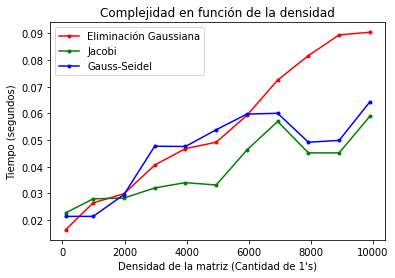

In [13]:
plt.plot(links, times_complejidad_densidad_eg, marker='.', linestyle='-', color='r', label="Eliminación Gaussiana")
plt.plot(links, times_complejidad_densidad_jb, marker='.', linestyle='-', color='g', label="Jacobi")
plt.plot(links, times_complejidad_densidad_gs, marker='.', linestyle='-', color='b', label="Gauss-Seidel")
plt.xlabel("Densidad de la matriz (Cantidad de 1's)")
plt.ylabel("Tiempo (segundos)")
plt.title(f"Complejidad en función de la densidad")
plt.legend()


plt.savefig('./graficos/complejidad_densidad.png')
plt.show()
plt.close()